<a href="https://colab.research.google.com/github/v-3sg/sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DS Week 1/sales_predictions.csv"


In [3]:
df = pd.read_csv(filename)

1 - Explore the data - what do you need to do to clean this data? Clean it!



Data Dictionary for this dataset:

Variable Name	Description

Item_Identifier	Unique product ID

Item_Weight	Weight of product

Item_Fat_Content	Whether the product is low fat or regular

Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

Item_Type	The category to which the product belongs

Item_MRP	Maximum Retail Price (list price) of the product

Outlet_Identifier	Unique store ID

Outlet_Establishment_Year	The year in which store was established

Outlet_Size	The size of the store in terms of ground area covered

Outlet_Location_Type	The type of area in which the store is located

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.


**--> Based on the Data Dictionary, potential irrelevant columns include:**

**Outlet_Establishment_Year**

**Outlet_Size**

**Outlet_Location**

**Outlet_Type**

**... However, there is the possibility that these columns represent variables that may affect whether a certain food item is purchased, e.g., an outlet of a certain size/type/age may nudge a customer to buy an item. My initial thought is not to drop any columns.**


In [4]:
#check for duplicates
df.duplicated().any()

False

**--> No duplicates present**

2- Are there missing values in this dataset? Some stores might not report all the data due to technical glitches or other issues. If so, deal with these appropriately.

In [5]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#check for NaNs/nulls
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**--> Confirmed count of null values for Item_Weight (1463) and Outlet_Size (2410)**

3 - What are some summary statistics, aggregate information, or other useful trends you can see from the data using Pandas?

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
#explore descriptive statistics of data
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


**--> Summary of statistics:**

**There seems to be a weight outlier (min of Item_Weight = 4.555). Note Item_Weight data may be skewed due to presence of NaN values for this column.**

**Low Fat items seemed to be the most bought (Item_Fat_Content frequency = 5089)**

**Average price of purchased items was about 140.99 (see Item_MRP). Possible outliers for min value and max value.**

**For Outlet_Size, frequency of Medium was highest (2793); however, this may be skewed due to presence of NaN values for this column.**

**For Outlet_Location_Type, frequency of Tier 3 was highest (3350).**

**For Outlet_Type, frequency of Supermarket Type 1 was highest (5577).**

**For Item_Outlet_Sales, there seems to be outliers with min at 33.29 and max at 13086.96**




In [10]:
#look at sample of null values
null_df = df[df.isnull().any(axis=1)]
null_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


**--> Cannot determine any pattern with the NaN values**

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features.

In [11]:
import matplotlib.pyplot as plot
import seaborn as sns

**--> Histograms**

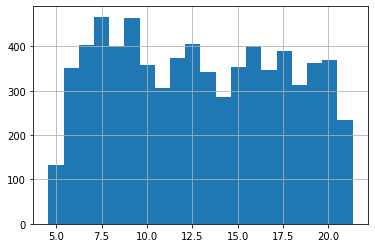

In [12]:
#histogram
#item weight

df['Item_Weight'].hist(bins = 20)

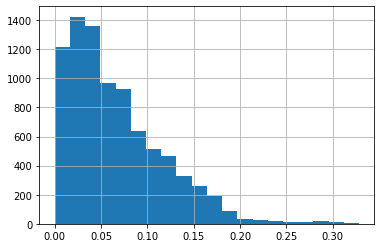

In [13]:
#histogram
#item visibility

df['Item_Visibility'].hist(bins = 20)

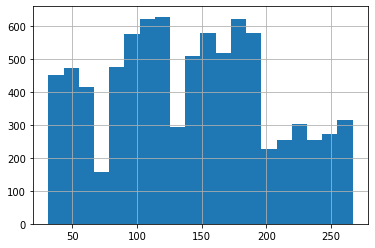

In [14]:
#histogram
#item MRP

df['Item_MRP'].hist(bins = 20)

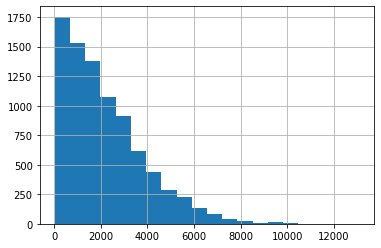

In [15]:
#histogram
#item outlet sales

df['Item_Outlet_Sales'].hist(bins = 20)

**--> Bar Chart (Just Curious)**

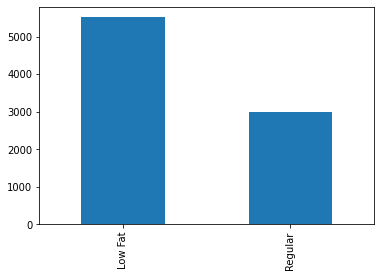

In [16]:
#columns below are categorical and would be better suited with bar chart
#item fat content
#outlet size
#outlet location type
#outlet type

#initial bar chart shows stray values "low fat", "LF", "reg"
#rename values then redo histogram
df = df.replace(['low fat','LF'],'Low Fat')
df = df.replace(['reg'], 'Regular')

#out of curiosity...
#bar chart
#item fat content
df['Item_Fat_Content'].value_counts().plot(kind = 'bar')

**--> Boxplots**

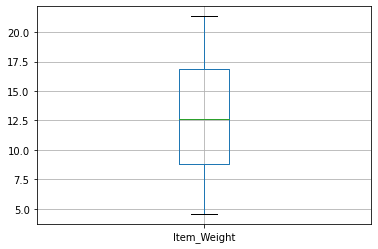

In [17]:
#boxplot
#item weight

df.boxplot(column = 'Item_Weight');

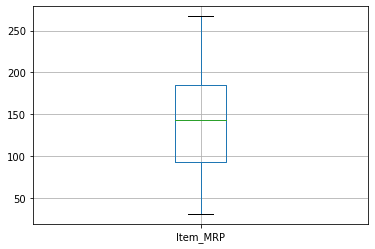

In [18]:
#boxplot
#item MRP

df.boxplot(column = 'Item_MRP');

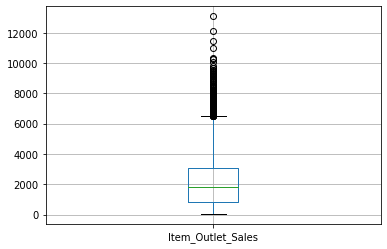

In [19]:
#boxplot
#item outlet sales

df.boxplot(column = 'Item_Outlet_Sales');

**--> Heatmap**

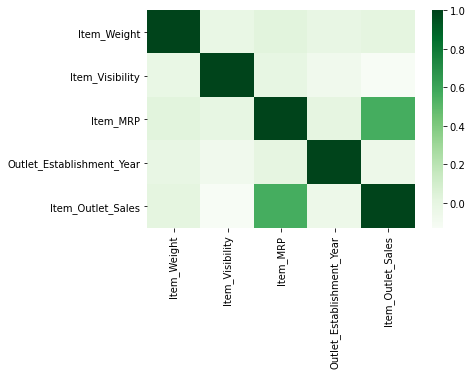

In [20]:
#heatmap
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

In [21]:
#checking correlation between item outlet sales and item MRP
outlet_sales_by_MRP = df['Item_Outlet_Sales'].corr(df['Item_MRP'])
outlet_sales_by_MRP

0.5675744466569195

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

**--> Based on the data exploration and initial visualizations in Part 3, I want to follow up with the Item Fat Content column values of Low Fat and Regular and tease out any possible correlations.** 

In [22]:
#grouping low fat content by item type
#get count for items sold
low_fat_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
low_fat_df = low_fat_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
low_fat_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Low Fat,Baking Goods,329
1,Low Fat,Breads,140
2,Low Fat,Breakfast,41
3,Low Fat,Canned,341
4,Low Fat,Dairy,418
5,Low Fat,Frozen Foods,450
6,Low Fat,Fruits and Vegetables,630
7,Low Fat,Hard Drinks,214
8,Low Fat,Health and Hygiene,520
9,Low Fat,Household,910


In [23]:
#grouping regular (fat) content by item type
#get count for items sold
regular_df = df[(df['Item_Fat_Content'] == 'Regular')]
regular_df = regular_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].count().reset_index()
regular_df

,Item_Fat_Content,Item_Type,Item_Outlet_Sales
0,Regular,Baking Goods,319
1,Regular,Breads,111
2,Regular,Breakfast,69
3,Regular,Canned,308
4,Regular,Dairy,264
5,Regular,Frozen Foods,406
6,Regular,Fruits and Vegetables,602
7,Regular,Meat,255
8,Regular,Seafood,27
9,Regular,Snack Foods,508


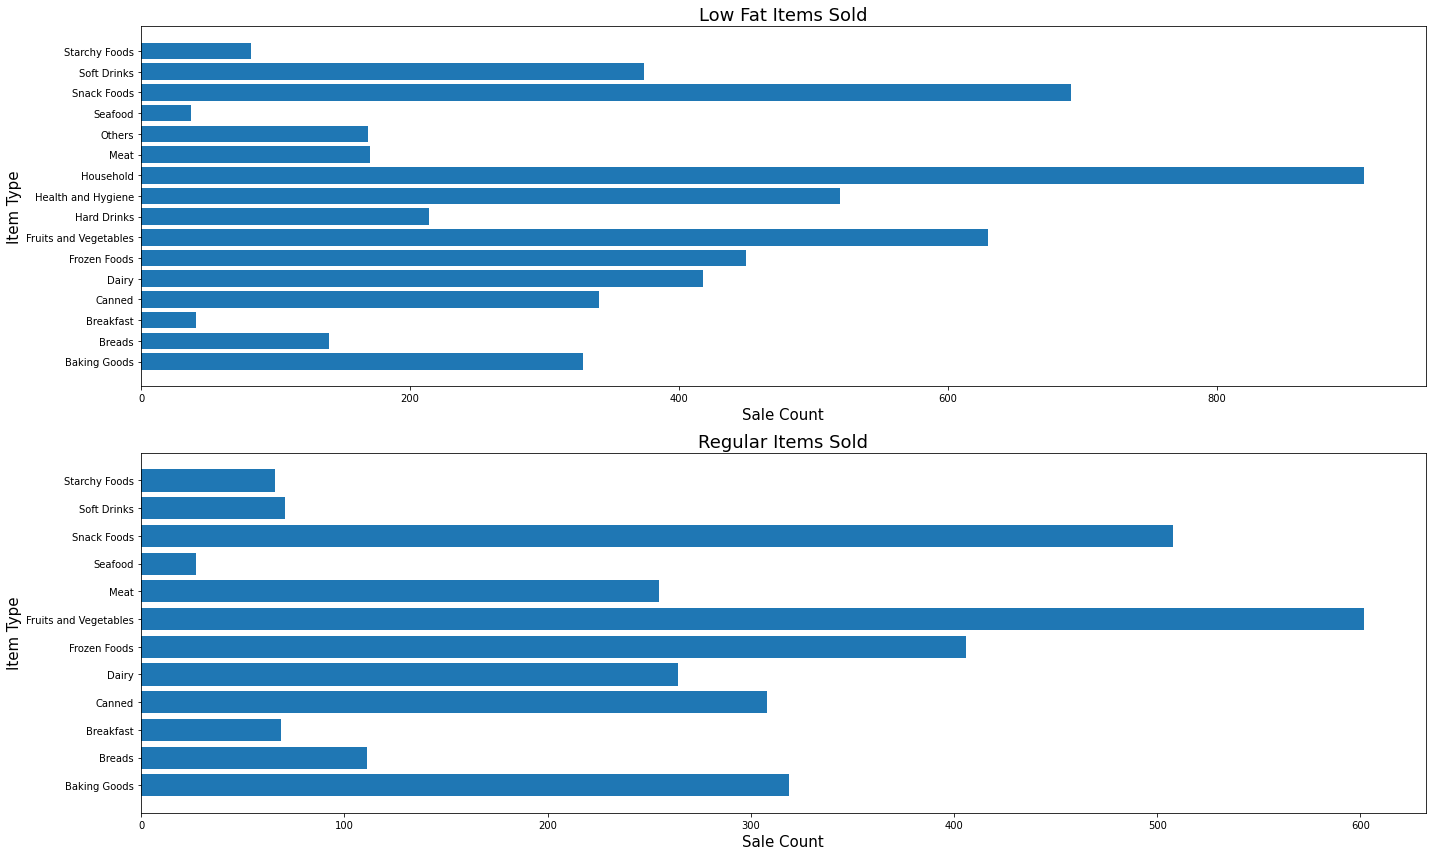

In [24]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=low_fat_df,  label = 'Low Fat Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Item_Type', 'Item_Outlet_Sales', data=regular_df,  label = 'Regular Sale Count');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Top 3 Low Fat items sold are Household, Snack Foods, and Fruits and Vegetables**

**Top 3 Regular items sold are Fruits and Vegetables, Snack Foods, and Frozen Foods**

**--> I'll use Low Fat and Regular to filter out another column variable...**

In [25]:
#get count of outlet types
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

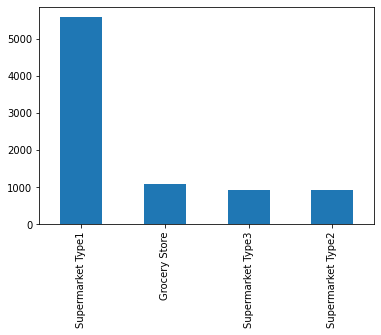

In [26]:
#visualize
df['Outlet_Type'].value_counts().plot(kind = 'bar');

In [27]:
#group by low fat content by outlet type and get count
lf_outlet_df = df[(df['Item_Fat_Content'] == 'Low Fat')]
lf_outlet_df = lf_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
lf_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Grocery Store,705
1,Low Fat,Supermarket Type1,3609
2,Low Fat,Supermarket Type2,598
3,Low Fat,Supermarket Type3,605


In [28]:
#group by regular (fat) content by outlet type and get count
reg_outlet_df = df[(df['Item_Fat_Content'] == 'Regular')]
reg_outlet_df = reg_outlet_df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Outlet_Sales'].count().reset_index()
reg_outlet_df

,Item_Fat_Content,Outlet_Type,Item_Outlet_Sales
0,Regular,Grocery Store,378
1,Regular,Supermarket Type1,1968
2,Regular,Supermarket Type2,330
3,Regular,Supermarket Type3,330


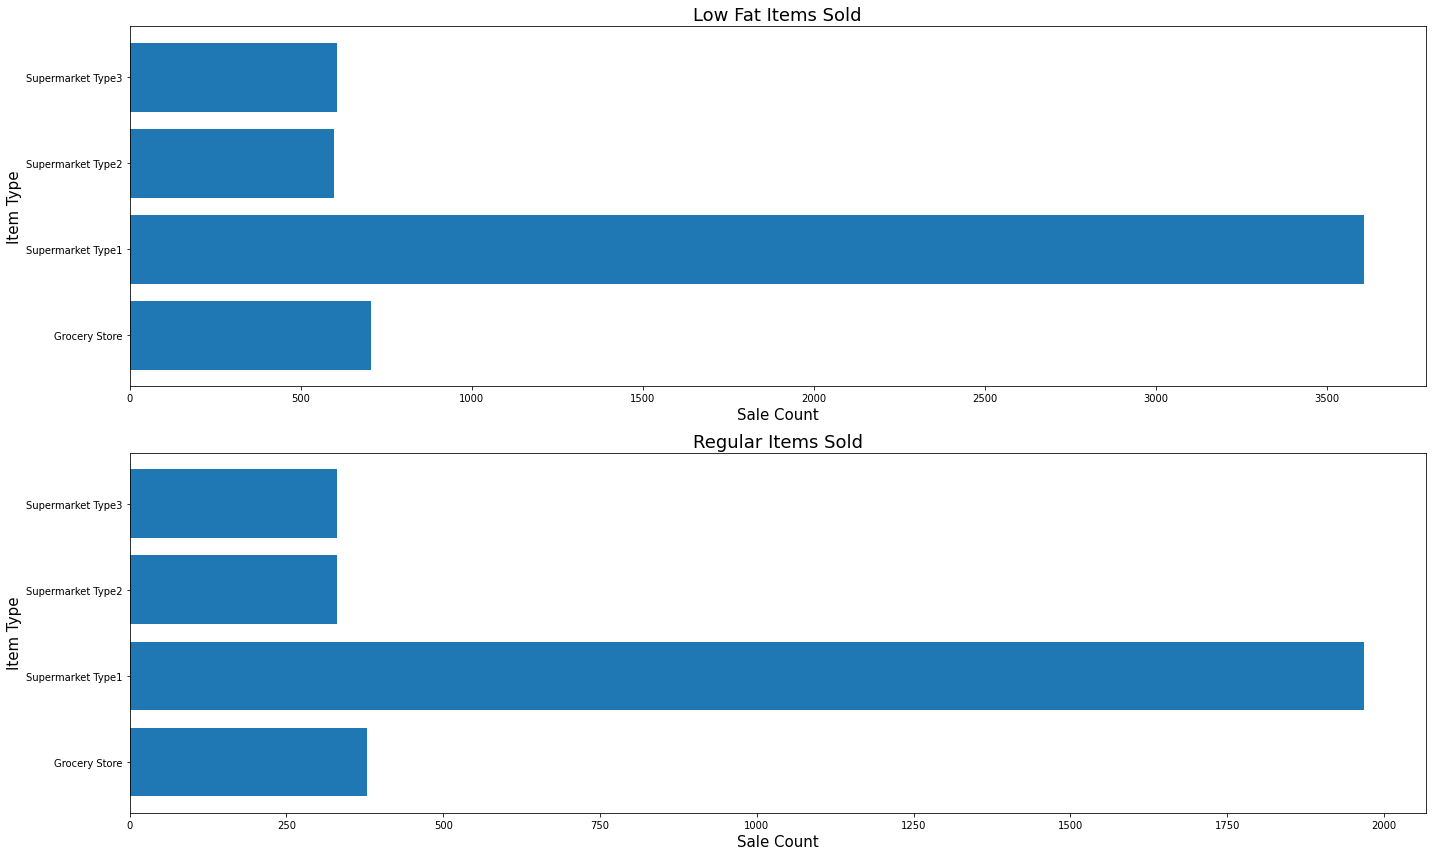

In [29]:
plot.figure(figsize=(20,12))
# bar plot with matplotlib

plot.subplot(2, 1, 1)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=lf_outlet_df,  label = 'Low Fat Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Low Fat Items Sold', size=18);

plot.subplot(2, 1, 2)
plot.barh('Outlet_Type', 'Item_Outlet_Sales', data=reg_outlet_df,  label = 'Regular Sale Count by Outlet Type');
plot.xlabel('Sale Count', size=15);
plot.ylabel('Item Type', size=15);
plot.title('Regular Items Sold', size=18);

plot.tight_layout()

**--> Interpretation:**

**Supermarket Type1 overwhelmingly had the highest amount of Low Fat sales**

**Supermarket Type1 overwhelmingly had the highest amount of Regular sales**


For Part 5, your task is to use Linear Regression to create and evaluate a model to predict sales:

Use the data you have cleaned in previous weeks. 



Spend time transforming your categorical variables into numbers and use dummy encoding where appropriate.

In [30]:
#loose ends
#replace null values in Item_Weight
#with mean value of Item_Weight
mean_value_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=mean_value_weight, inplace=True)


In [31]:
#remaining field with null values (Outlet_Size)
#will be transformed as part of dummy encoding
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
#get values for the categorical variables
print(df['Item_Identifier'].value_counts())
print(df['Item_Fat_Content'].value_counts())
print(df['Item_Type'].value_counts())
print(df['Outlet_Identifier'].value_counts())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Location_Type'].value_counts())
print(df['Outlet_Type'].value_counts())

FDG33    10
FDW13    10
FDD38     9
FDX31     9
FDU12     9
         ..
FDQ60     1
FDE52     1
FDO33     1
FDC23     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Siz

In [33]:
#transform categorical variables into numbers
#use dummy encoding where appropriate

#dummy encode categorical variables
encoded_df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [34]:
encoded_df.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,...,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [35]:
#checking for correlations
#probably too many variables
encoded_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,...,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,-0.012049,0.024756,-0.008301,0.011550,0.021157,-0.021157,-0.007899,0.031462,-0.024957,-0.016186,-0.038657,-0.020883,-0.002919,0.022635,-0.036312,0.025599,-0.023575,0.018099,-0.034541,0.005919,0.000653,-0.012397,-0.004344,-0.034296,0.012458,-0.013129,0.005771,-0.036571,0.027026,-0.020744,-0.015191,0.014877,-0.009997,0.045743,-0.043273,-0.030169,0.002062,0.011431,-0.006329,...,0.040089,-0.013517,-0.014941,0.008686,-0.032596,-0.050612,-0.001958,-0.031142,0.032923,0.000624,0.029537,-0.047327,0.014199,0.035968,-0.001732,0.027165,-0.004999,0.010271,-0.047155,0.023019,0.003467,0.012313,-0.002559,0.001299,1.034665e-14,1.413048e-14,-0.002343,-0.017187,0.000758,0.004953,0.012313,0.004152,-0.001100,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,1.413048e-14
Item_Visibility,-1.204853e-02,1.000000,-0.001315,-0.074834,-0.128625,-0.047314,0.047314,-0.017581,-0.010041,0.040746,0.005817,-0.027297,-0.019113,0.005748,-0.023579,-0.024133,-0.011860,-0.017523,-0.012231,-0.009988,-0.000709,-0.014152,-0.000293,-0.002252,0.000085,-0.009447,0.001247,-0.017975,0.010134,-0.020403,-0.028303,0.042844,-0.012455,0.046719,-0.021965,-0.003703,-0.018050,-0.026774,0.003373,0.041923,...,-0.006813,-0.026807,-0.018012,0.007943,0.016887,0.000416,0.043418,0.011114,0.035984,-0.003153,0.018969,-0.003700,-0.053931,-0.032230,-0.017087,-0.016240,0.014910,0.005635,-0.009825,0.003688,0.180697,-0.041937,-0.032179,-0.034671,2.107357e-01,-5.114446e-02,-0.033025,-0.038353,-0.038444,-0.036130,-0.041937,-0.081061,0.063502,0.061346,-0.068787,0.009650,0.286400,-0.144249,-0.034671,-5.114446e-02
Item_MRP,2.475610e-02,-0.001315,1.000000,0.005020,0.567574,-0.006063,0.006063,0.000372,0.010633,0.021750,0.014643,0.018948,0.004688,-0.014534,-0.046841,-0.039223,0.017129,-0.005809,0.003040,-0.025213,0.044713,0.013047,0.001151,-0.033169,-0.022833,-0.035236,0.042298,0.000484,-0.013736,-0.016710,-0.043733,0.033715,0.017413,0.024801,-0.043420,-0.012101,-0.021209,-0.027779,-0.018894,-0.018429,...,-0.005977,0.037215,0.018414,0.009789,-0.067311,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,-0.000912,0.002438,-0.00

Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.

**--> Attempt #1: Using ALL columns (1601 total) as X, Item_Outlet_Sales as y.**

In [38]:
#set features matrix (X)
#set 'Item_Outlet_Sales' as target (y)
X = encoded_df.drop('Item_Outlet_Sales', axis=1)
y = encoded_df['Item_Outlet_Sales']


In [39]:
print(X.shape)
print(y.shape)

(8523, 1601)
(8523,)


Be sure to train test split your data set!

In [40]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Build a linear regression model.

In [41]:
# Make a linear regression instance
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [42]:
#train the model
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#linear regression model
# predict all values on the training data
train_preds = reg.predict(X_train)
# predict the values in the test set
test_preds = reg.predict(X_test)

Evaluate your test set results using r2.

In [44]:
#r2
from sklearn.metrics import r2_score
print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.6716977915178228
-2523656567959085.5


**--> r2 for the training data is 0.6716, but a very large negative number for the test data...? From what I've read online, this means the model fits very badly. Looks like using all columns as variables "dilutes" any possible correlation.**

Evaluate your test set results using RMSE

In [45]:
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np


In [46]:
#mean squared error for training data
print(mean_squared_error(y_train, train_preds))
#mean squared error for test data
print(mean_squared_error(y_test, test_preds))

971595.8437012467
6.962711153223211e+21


In [47]:
#root mean squared error for training data
mse_train = mean_squared_error(y_train, train_preds)
print(np.sqrt(mse_train))
#root mean squared error for test data
mse_test = mean_squared_error(y_test, test_preds)
print(np.sqrt(mse_test))

985.6956141229638
83442861607.34908


**--> Looking at the RMSE values (especially for the test data), using all columns for the feature matrix is problematic.**

**--> Attempt #2: Going back to my earlier exploration in Part 4, it seems there's a correlation among Item_Fat_Content, Item_Type, Outlet_Type and Item_Outlet_Sales. I'll use those (in their encoded forms) as the features matrix.**

In [58]:
#set features matrix (X)
#set 'Item_Outlet_Sales' as target (y)
X2 = df.drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales'], axis=1)
X2 = pd.get_dummies(X2, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type'])
y2 = encoded_df['Item_Outlet_Sales']

In [59]:
#train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

In [60]:
# Make a linear regression instance
reg2 = LinearRegression()

In [62]:
#train the model
reg2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#linear regression model
# predict all values on the training data
train_preds2 = reg2.predict(X_train2)
# predict the values in the test set
test_preds2 = reg2.predict(X_test2)

In [64]:
#r2
from sklearn.metrics import r2_score
print(r2_score(y_train2, train_preds2))
print(r2_score(y_test2, test_preds2))

0.23701297088751117
0.260306557642226


**--> r2 looks better in that the values are lower (and none are negative).**

In [65]:
#mean squared error for training data
print(mean_squared_error(y_train2, train_preds2))
#mean squared error for test data
print(mean_squared_error(y_test2, test_preds2))

2258026.315786727
2040797.4074046195


In [66]:
#root mean squared error for training data
mse_train2 = mean_squared_error(y_train2, train_preds2)
print(np.sqrt(mse_train2))
#root mean squared error for test data
mse_test2 = mean_squared_error(y_test2, test_preds2)
print(np.sqrt(mse_test2))

1502.6730568512655
1428.5648068619846


**--> RMSE values are more closer together on Attempt #2 than Attempt #1.**

Which features are most associated with higher predicted sales?

In [71]:
df2 = df.drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type'], axis=1)
df2 = pd.get_dummies(df2, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type'])
df2.corr()

,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Outlet_Sales,1.000000,-0.018719,0.018719,-0.038381,0.002332,-0.004656,0.007387,0.008858,-0.009482,0.025950,-0.003956,-0.025587,0.015701,-0.002995,-0.021267,0.007380,0.022782,-0.024040,0.015039,-0.411727,0.108765,-0.038059,0.311192
Item_Fat_Content_Low Fat,-0.018719,1.000000,-1.000000,-0.083804,-0.032643,-0.065711,-0.073235,-0.021236,-0.085041,-0.116955,0.118461,0.188156,0.255203,-0.118574,0.104988,-0.012594,-0.059848,0.094875,-0.025945,0.002924,-0.000533,-0.002129,-0.000183
Item_Fat_Content_Regular,0.018719,-1.000000,1.000000,0.083804,0.032643,0.065711,0.073235,0.021236,0.085041,0.116955,-0.118461,-0.188156,-0.255203,0.118574,-0.104988,0.012594,0.059848,-0.094875,0.025945,-0.002924,0.000533,0.002129,0.000183
Item_Type_Baking Goods,-0.038381,-0.083804,0.083804,1.000000,-0.049968,-0.032801,-0.082354,-0.084600,-0.095849,-0.117916,-0.046036,-0.073120,-0.099176,-0.065715,-0.040800,-0.024951,-0.116120,-0.067327,-0.038133,0.003536,0.001846,-0.003632,-0.002957
Item_Type_Breads,0.002332,-0.032643,0.032643,-0.049968,1.000000,-0.019918,-0.050010,-0.051373,-0.058204,-0.071605,-0.027955,-0.044402,-0.060225,-0.039906,-0.024776,-0.015152,-0.070514,-0.040885,-0.023156,0.002305,-0.006189,-0.000734,0.007693
Item_Type_Breakfast,-0.004656,-0.065711,0.065711,-0.032801,-0.019918,1.000000,-0.032828,-0.033723,-0.038207,-0.047004,-0.018351,-0.029147,-0.039533,-0.026195,-0.016264,-0.009946,-0.046288,-0.026838,-0.015201,0.015676,-0.008695,0.000077,-0.003550
Item_Type_Canned,0.007387,-0.073235,0.073235,-0.082354,-0.050010,-0.032828,1.000000,-0.084670,-0.095929,-0.118015,-0.046074,-0.073181,-0.099258,-0.065770,-0.040834,-0.024972,-0.116217,-0.067383,-0.038165,-0.012574,0.001236,0.010418,0.001136
Item_Type_Dairy,0.008858,-0.021236,0.021236,-0.084600,-0.051373,-0.033723,-0.084670,1.000000,-0.098544,-0.121232,-0.047330,-0.075176,-0.101965,-0.067563,-0.041947,-0.025653,-0.119386,-0.069220,-0.039205,0.006933,0.003396,-0.001746,-0.010817
Item_Type_Frozen Foods,-0.009482,-0.085041,0.085041,-0.095849,-0.058204,-0.038207,-0.095929,-0.098544,1.000000,-0.137352,-0.053624,-0.085173,-0.115523,-0.076547,-0.047525,-0.029064,-0.135260,-0.078425,-0.044418,-0.006763,0.009750,-0.001507,-0.006128
Item_Type_Fruits and Vegetables,0.025950,-0.116955,0.116955,-0.117916,-0.071605,-0.047004,-0.118015,-0.121232,-0.137352,1.000000,-0.065970,-0.104782,-0.142120,-0.094171,-0.058467,-0.035755,-0.166402,-0.096481,-0.054645,-0.004556,-0.000811,0.000919,0.005173


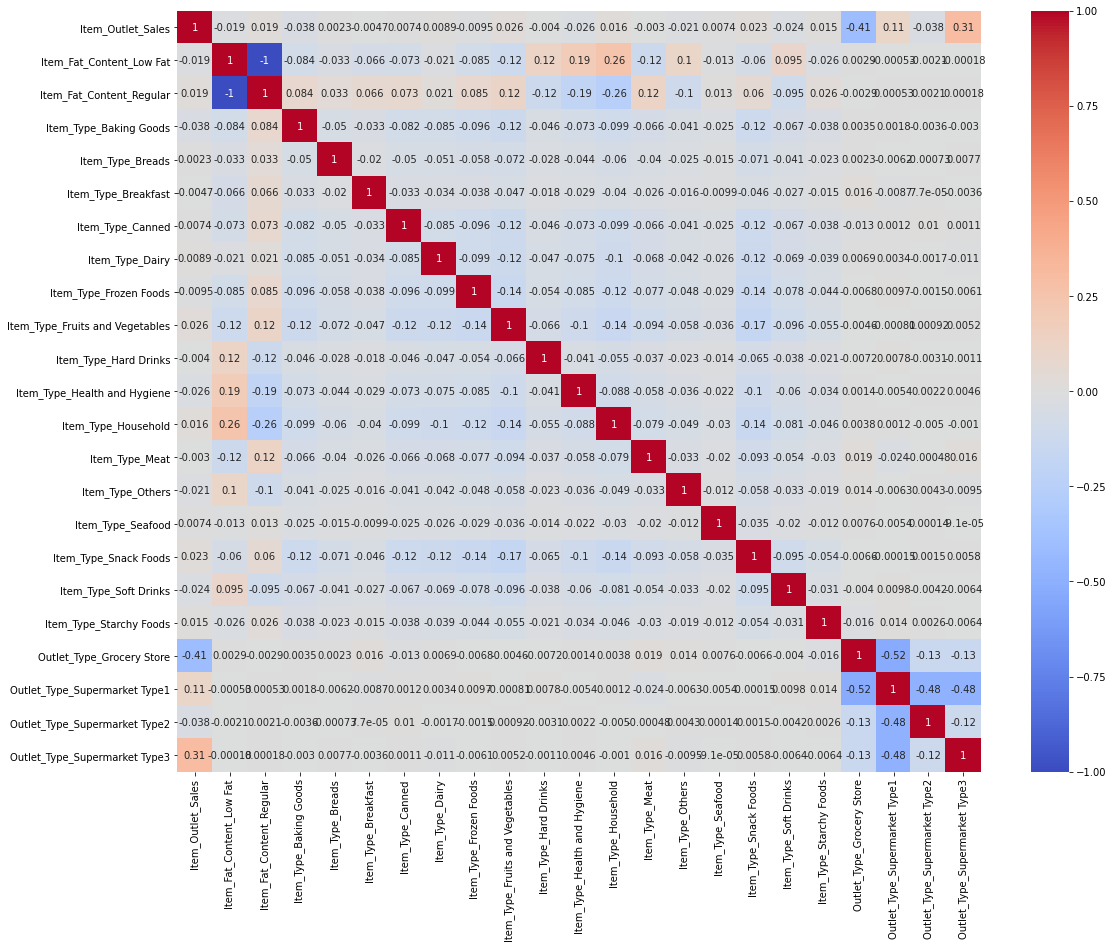

In [72]:
#making the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlate_df2 = df2.corr()

plt.figure(figsize = (18,14))
sns.heatmap(correlate_df2, annot = True, cmap="coolwarm");

**--> Per the heat map and correlation table, there seems to be a weak correlation to barely moderate correlation between Outlet_Type and Item_Outlet_Sales (0.31 for Supermarket Type3 and -0.41 Grocery Store). The other features I tested in Attempt #2 doesn't seem to have a correlation.**

**--> Final Part**

Your task is to build tree based models to predict sales and compare evaluation metrics for regression problems.  

Build and evaluate a simple decision tree model.

Build and evaluate a bagged tree model.

Build and evaluate a random forest model.  

You now have tried at least 4 models on this data set (including the regression model from last week).  

Compare the performance of your models based on r^2.

Compare the performance of your models based on rmse.  

Overall, which model do you recommend?

Also, to finalize this project, you need to prepare a short (5-10 minute) presentation about your project

Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. 

Think of this as an executive summary or an overview of your project.

Prepare a short (5-10 minute) presentation with slides (Google Slides, PowePoint, etc).  Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.

Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.

**--> Building and evaluate simple decision tree...**

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
#reusing features matrix and target created during Part 5
#X = all columns except Item_Outlet_Sales
#y = Item_Outlet_Sales

In [76]:
#instance of model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [77]:
#reusing train test split created during Part 5

In [78]:
#fit model
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [79]:
#predict target values
dec_train_preds = dec_tree.predict(X_train)
dec_test_preds = dec_tree.predict(X_test)

In [121]:
#evaluate model for r^2
dec_train_score = dec_tree.score(X_train, y_train)
dec_test_score = dec_tree.score(X_test, y_test)
print('Simple Decision Tree R^2 for training data:', dec_train_score)
print('Simple Decision Tree R^2 for test data:', dec_test_score)

Simple Decision Tree R^2 for training data: 0.9999999773162772
Simple Decision Tree R^2 for test data: 0.2320450082105373


**--> R^2 training score is 1.0000 and R^2 test score is 0.2320 so the model run at normal parameters doesn't work.**

In [122]:
#check for depth
dec_tree.get_depth()

59

In [123]:
#use function code to tune parameters
# List of values to try for max_depth:
max_depth_range = list(range(2, 60)) # will try every value between 2 and 60
# List to store the score for each value of max_depth:
r2_dec_tree = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    dec_tree_score = dec_tree.score(X_test, y_test)
    r2_dec_tree.append(dec_tree_score)

In [124]:
#scanning values
r2_dec_tree

[0.43377750447071634,
 0.5242218617296539,
 0.5839367270114887,
 0.5960564372160062,
 0.5846684022696164,
 0.5774371445642081,
 0.5572115303008938,
 0.5477429242661703,
 0.5375512072033247,
 0.5270119825308559,
 0.5165764914145936,
 0.5066401958643305,
 0.48710108782788575,
 0.4869908952963901,
 0.4546660036971231,
 0.4431843125654561,
 0.42987620218375716,
 0.41883478900150145,
 0.41149625143489804,
 0.38648096486507216,
 0.38688026989808216,
 0.3602302811947291,
 0.3431550866086802,
 0.3258187630310556,
 0.31744470713823125,
 0.30482214205187186,
 0.29971143267179134,
 0.27646320215548115,
 0.29192409577080447,
 0.2722599872693824,
 0.26483458828037854,
 0.26133077274041705,
 0.24266005154656653,
 0.24090919190011037,
 0.2627304810194413,
 0.22262214956239368,
 0.22902668346276156,
 0.225336521591073,
 0.23713805566212076,
 0.2382451029955255,
 0.22797616439015453,
 0.2323622419661413,
 0.22511071834741125,
 0.233869917789854,
 0.23782572497672913,
 0.21844547587947982,
 0.2075807178

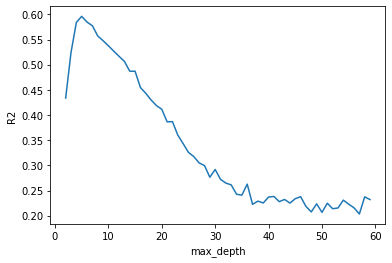

In [125]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2_dec_tree)
plt.xlabel('max_depth')
plt.ylabel('R2');


In [126]:
#max depth at 5 seems to have highest r^2 score
#run the model with optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
dec_train_5_score = dec_tree_5.score(X_train, y_train)
dec_test_5_score = dec_tree_5.score(X_test, y_test)
print(dec_train_5_score)
print(dec_test_5_score)

0.6042066848171654
0.5960564372160062


In [127]:
#predict target values using max depth 5
dec_5_train_preds = dec_tree_5.predict(X_train)
dec_5_test_preds = dec_tree_5.predict(X_test)

In [128]:
dec_5_actual_predict = pd.DataFrame({'Actual': y_test, 'Predicted': dec_5_test_preds})
print(dec_5_actual_predict)

         Actual    Predicted
7503  1743.0644  1141.520153
2957   356.8688   730.151568
7031   377.5086   730.151568
1084  5778.4782  5240.872776
856   2356.9320  3008.585683
...         ...          ...
4753  3793.7284  3008.585683
4836  2410.8618  2023.021551
8064  5309.7550  3587.402879
4418  2530.7058  2023.021551
1784  4138.6128  2516.851801

[2131 rows x 2 columns]


In [129]:
#evaluate model for RMSE

#mean squared error for training data
print('MSE training data:', mean_squared_error(y_train, dec_5_train_preds))
#mean squared error for test data
print('MSE test data:', mean_squared_error(y_test, dec_5_test_preds))

#root mean squared error for training data
dec_mse_train = mean_squared_error(y_train, dec_5_train_preds)
print('RMSE training data', np.sqrt(dec_mse_train))
#root mean squared error for test data
dec_mse_test = mean_squared_error(y_test, dec_5_test_preds)
print('RMSE test data', np.sqrt(dec_mse_test))

MSE training data: 1171332.7844313178
MSE test data: 1114471.1152767404
RMSE training data 1082.281287111312
RMSE test data 1055.6851402178304


**--> With max depth set to 5, the RMSE scores are very close to each other (1082.28 for training and 1055.69 for test). To put RMSE into context, the mean for Item_Outlet_Sales is 2181.288914**

**--> Building bagged tree model...**

In [130]:
from sklearn.ensemble import BaggingRegressor

In [131]:
#reuse features matrix and y

In [132]:
#make instance
bagreg = BaggingRegressor(random_state = 42)

In [133]:
#reuse train test split

In [134]:
#fit the model
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [135]:
#make prediction
bagreg.predict(X_test)

array([ 840.10644, 1005.82406,  850.8924 , ..., 4503.4712 , 2122.77014,
       1696.05892])

In [136]:
#evaluate
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9184305613535784
0.5304010050505383


**--> Bagging tree model shows a r^2 test score very different from r^2 training score... adjust estimators to get a better fit.**

In [137]:
#make instance with 50 estimators
bagreg_50_est = BaggingRegressor(n_estimators = 50, random_state = 42)

In [138]:
#fit the model
bagreg_50_est.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=50,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [139]:
#evaluate
bagreg_50_est_train_score = bagreg_50_est.score(X_train, y_train)
bagreg_50_est_test_score = bagreg_50_est.score(X_test, y_test)
print(bagreg_50_est_train_score)
print(bagreg_50_est_test_score)

0.9354064420199506
0.5472745291296934


**--> Adjusting estimators to 50 for bagging tree model increases r^2 values for both training and test data but not by a lot. Will try again except with 100 estimators.**

In [140]:
#make instance with 100 estimators
bagreg_100_est = BaggingRegressor(n_estimators = 100, random_state = 42)

In [141]:
#fit the model
bagreg_100_est.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [142]:
#evaluate
bagreg_100_est_train_score = bagreg_100_est.score(X_train, y_train)
bagreg_100_est_test_score = bagreg_100_est.score(X_test, y_test)
print(bagreg_100_est_train_score)
print(bagreg_100_est_test_score)

0.9377247091988374
0.551345304427881


**--> Setting the bagging model to 100 estimators (doubling the estimators from 50) increases the r^2 values again but only slightly.**

In [143]:
#predict target values using 100 estimators
br_100_train_preds = bagreg_100_est.predict(X_train)
br_100_test_preds = bagreg_100_est.predict(X_test)

In [144]:
br_100_actual_predict = pd.DataFrame({'Actual': y_test, 'Predicted': br_100_test_preds})
print(br_100_actual_predict)

         Actual    Predicted
7503  1743.0644   731.660936
2957   356.8688   908.856948
7031   377.5086   890.673950
1084  5778.4782  4763.925502
856   2356.9320  2300.864982
...         ...          ...
4753  3793.7284  4199.060782
4836  2410.8618  1934.035814
8064  5309.7550  4171.796272
4418  2530.7058  1933.316750
1784  4138.6128  2134.355060

[2131 rows x 2 columns]


In [145]:
#evaluate model for RMSE (100 estimators)

#mean squared error for training data
print('MSE training data:', mean_squared_error(y_train, br_100_train_preds))
#mean squared error for test data
print('MSE test data:', mean_squared_error(y_test, br_100_test_preds))

#root mean squared error for training data
br_100_mse_train = mean_squared_error(y_train, br_100_train_preds)
print('RMSE training data', np.sqrt(br_100_mse_train))
#root mean squared error for test data
br_100_mse_test = mean_squared_error(y_test, br_100_test_preds)
print('RMSE test data', np.sqrt(br_100_mse_test))

MSE training data: 184300.9646125506
MSE test data: 1237828.1151512852
RMSE training data 429.30288213864884
RMSE test data 1112.5772400832604


**--> RMSE values are not similar, with training data having a much lower score than test data. Compared with the simple decision tree, the bagged tree model set at 100 estimators has lower RMSE for training (simple tree RMSE is 1082.28 for training) but higher RMSE for test (simple tree RMSE is 1055.69 for test)**

**--> Building random forest model...**

In [146]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
#create the instance
rf = RandomForestRegressor(random_state = 42)

In [148]:
#fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [149]:
#evaluate the model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9378762392458452
0.5513657685170863


In [150]:
#setting max depth to 5 (similar to simple decision tree)
rf_d5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_d5.fit(X_train, y_train)
rf_d5_train_score = rf_d5.score(X_train, y_train)
rf_d5_test_score = rf_d5.score(X_test, y_test)
print(rf_d5_train_score)
print(rf_d5_test_score)

0.6121804695202819
0.6038708802176618


**--> The random forest model set to max depth of 5 has slightly better r^2 scores than simple decision tree model set to max depth of 5.**

In [151]:
#use function code to tune parameters
# List of values to try for max_depth:
rf_max_depth_range = list(range(2, 60)) # will try every value between 2 and 60
# List to store the score for each value of max_depth:
r2_rf = []
for depth in max_depth_range:
    rf_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    rf_tree.fit(X_train, y_train)
    rf_tree_score = rf_tree.score(X_test, y_test)
    r2_rf.append(rf_tree_score)

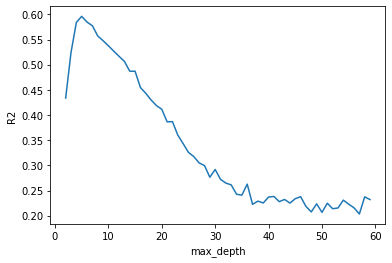

In [152]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2_rf)
plt.xlabel('max_depth')
plt.ylabel('R2');


**--> Running a function to automatically plot R^2 versus max depth looks almost exactly the same as the plot done for simple decision tree.**

In [153]:
#setting max depth to 30
rf_d30 = RandomForestRegressor(max_depth = 30, random_state = 42)
rf_d30.fit(X_train, y_train)
rf_d30_train_score = rf_d30.score(X_train, y_train)
rf_d30_test_score = rf_d30.score(X_test, y_test)
print(rf_d30_train_score)
print(rf_d30_test_score)

0.9089126301621159
0.5587539251895384


In [154]:
[estimator.get_depth() for estimator in rf.estimators_]

[52,
 47,
 61,
 52,
 69,
 60,
 49,
 54,
 64,
 51,
 75,
 62,
 49,
 58,
 47,
 60,
 63,
 61,
 52,
 69,
 61,
 56,
 48,
 58,
 54,
 56,
 55,
 62,
 59,
 60,
 53,
 69,
 52,
 54,
 52,
 63,
 87,
 60,
 54,
 58,
 56,
 58,
 66,
 51,
 52,
 62,
 68,
 75,
 56,
 59,
 60,
 57,
 56,
 65,
 62,
 86,
 48,
 59,
 68,
 50,
 52,
 66,
 57,
 61,
 64,
 53,
 56,
 60,
 69,
 66,
 54,
 60,
 58,
 62,
 62,
 47,
 68,
 62,
 60,
 55,
 63,
 77,
 55,
 51,
 64,
 56,
 60,
 71,
 58,
 50,
 53,
 57,
 65,
 62,
 52,
 46,
 53,
 58,
 61,
 68]

In [155]:
#looks like estimators were set to a high value of 87

In [156]:
# Try 200 trees
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Fit the model
rf_200.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9389575507314959
0.55136331528191


In [157]:
# Try 400 trees
rf_400 = RandomForestRegressor(n_estimators = 400, random_state = 42)
# Fit the model
rf_400.fit(X_train, y_train)
# Obtain the scores
rf_400_train_score = rf_400.score(X_train, y_train)
rf_400_test_score = rf_400.score(X_test, y_test)
print(rf_400_train_score)
print(rf_400_test_score)

0.9394998808325107
0.5507746673138063


In [158]:
# Try 1000 trees
rf_1000 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Fit the model
rf_1000.fit(X_train, y_train)
# Obtain the scores
rf_1000_train_score = rf_1000.score(X_train, y_train)
rf_1000_test_score = rf_1000.score(X_test, y_test)
print(rf_1000_train_score)
print(rf_1000_test_score)

0.9398422851448914
0.5516588342176828


In [162]:
#setting estimators to 1000, max depth to 5
rf_1000_5 = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 42)
rf_1000_5.fit(X_train, y_train)
rf_1000_5_train_score = rf_1000_5.score(X_train, y_train)
rf_1000_5_test_score = rf_1000_5.score(X_test, y_test)
print(rf_1000_5_train_score)
print(rf_1000_5_test_score)

0.6120511099062069
0.604870630939758


**--> After making adjustments to either max depth, number of estimators, or a combination of both it looks like the best R^2 test scores occurs at max depth of 5 with 1000 estimators. Focusing on raising estimators exculsively raises the R^2 training scores to the 0.93 range but keeps the test scores to the 0.55 range.**

In [163]:
#predict target values using 1000 estimators and max depth at 5
rf_1000_5_train_preds = rf_1000_5.predict(X_train)
rf_1000_5_test_preds = rf_1000_5.predict(X_test)

In [166]:
#print out actual vs. predicted
rf_1000_5_actual_predict = pd.DataFrame({'Actual': y_test, 'Predicted': rf_1000_5_test_preds})
print(rf_1000_5_actual_predict)

         Actual    Predicted
7503  1743.0644  1264.259834
2957   356.8688   695.297062
7031   377.5086   695.072476
1084  5778.4782  4904.856214
856   2356.9320  3113.738389
...         ...          ...
4753  3793.7284  2872.599517
4836  2410.8618  2109.923697
8064  5309.7550  3522.664772
4418  2530.7058  2009.966874
1784  4138.6128  2425.969538

[2131 rows x 2 columns]


In [164]:
#evaluate model for RMSE
#using 1000 estimators and max depth at 5 for best R^2 test value

#mean squared error for training data
print('MSE training data:', mean_squared_error(y_train, rf_1000_5_train_preds))
#mean squared error for test data
print('MSE test data:', mean_squared_error(y_test, rf_1000_5_test_preds))

#root mean squared error for training data
rf_1000_5_mse_train = mean_squared_error(y_train, rf_1000_5_train_preds)
print('RMSE training data', np.sqrt(rf_1000_5_mse_train))
#root mean squared error for test data
rf_1000_5_mse_test = mean_squared_error(y_test, rf_1000_5_test_preds)
print('RMSE test data', np.sqrt(rf_1000_5_mse_test))


MSE training data: 1148117.555852823
MSE test data: 1090152.954982581
RMSE training data 1071.5024758967302
RMSE test data 1044.1039004728318


**--> For the random forest model, the RMSE values of 1071.50 training and 1044.10 test are the lowest when compared to the linear regression (training 1502.73, test 1429.34) and simple decision tree (training 1082.28, test 1055.69). Random forest has a higher training score when compared with bagging tree (training 429.30) but still a lower test score (test is 1113.58 for bagging tree).**

**--> Ultimately, we want to rely on a model that does well for R^2 score (as close to 1.0000 as possible) while maintaining similarity in R^2 scores between the training and test data. Should performance of the model be higher for either the training or test data, then it would better to maintain the integrity between training and test data then favor one over the other.**

**--> Since the target variable is Item Outlet Sales, the RMSE would be in target variable units and would indicate "closeness" to the line of best fit for the target variable. Therefore, the lower value for RMSE would be better.**

**--> Given the above, I would recommend the random forest model set at max depth of 5 with 1000 estimators. This would give R^2 training of 0.6121 and R^2 test of 0.6049 and RMSE training of 1071.50 and RMSE test of 1044.10.**